In [65]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score , confusion_matrix , f1_score

In [2]:
df = pd.read_csv('pima-indians-diabetes_label.csv')

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeF,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Pregnancies        768 non-null    int64  
 1   Glucose            768 non-null    int64  
 2   BloodPressure      768 non-null    int64  
 3   SkinThickness      768 non-null    int64  
 4   Insulin            768 non-null    int64  
 5   BMI                768 non-null    float64
 6   DiabetesPedigreeF  768 non-null    float64
 7   Age                768 non-null    int64  
 8   Outcome            768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeF,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
df.skew()

Pregnancies          0.901674
Glucose              0.173754
BloodPressure       -1.843608
SkinThickness        0.109372
Insulin              2.272251
BMI                 -0.428982
DiabetesPedigreeF    1.919911
Age                  1.129597
Outcome              0.635017
dtype: float64

In [10]:
df.kurt()

Pregnancies          0.159220
Glucose              0.640780
BloodPressure        5.180157
SkinThickness       -0.520072
Insulin              7.214260
BMI                  3.290443
DiabetesPedigreeF    5.594954
Age                  0.643159
Outcome             -1.600930
dtype: float64

<AxesSubplot:>

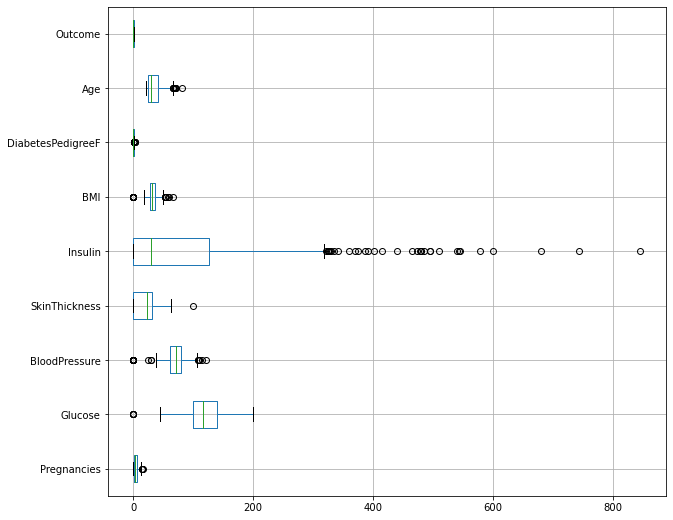

In [13]:
df.boxplot(figsize= (10,9) ,vert = False)

#  insulin has most number of outliers 

# perform  outlier treatment  

In [14]:
def remove_outlier(col):
    sorted (col)
    Q1 ,Q3 , = np.percentile(col, (25 ,75))
    IQR = Q3 -Q1
    Lw = Q1 - (1.5*IQR)
    Uw = Q3 + (1.5*IQR)
    return Lw , Uw

In [16]:
for column in df.drop(['Outcome'] , axis = 1).columns:
    LW, UW = remove_outlier(df[column])
    df[column] = np.where(df[column] > UW , UW ,df[column])
    df[column] = np.where(df[column] < LW , LW ,df[column])                     

<AxesSubplot:>

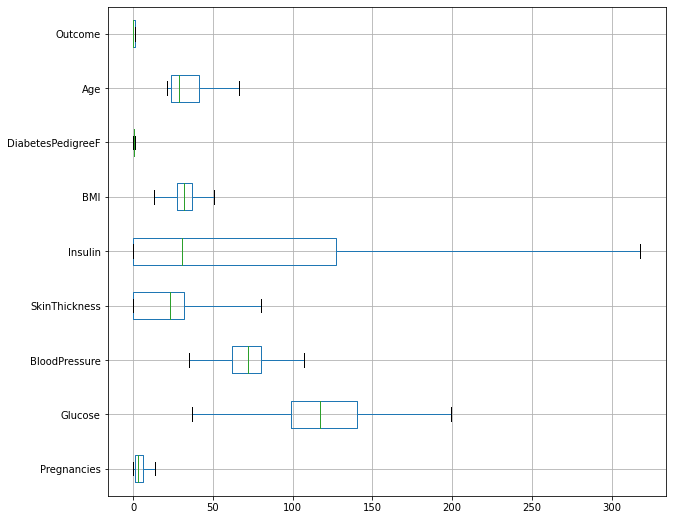

In [19]:
df.boxplot(figsize= (10,9) , vert = False)

# perfrom train test split 

In [21]:
X = df.drop('Outcome' , axis= 1 )
Y = df['Outcome']

In [30]:
X_train , X_test , Y_train , Y_test = train_test_split(X,Y , test_size= 0.3 , random_state= 1)

In [31]:
df.shape

(768, 9)

In [32]:
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeF,Age
88,13.5,136.0,70.0,32.0,110.0,37.1,0.153,43.0
467,0.0,97.0,64.0,36.0,100.0,36.8,0.600,25.0
550,1.0,116.0,70.0,28.0,0.0,27.4,0.204,21.0
147,2.0,106.0,64.0,35.0,119.0,30.5,1.200,34.0
481,0.0,123.0,88.0,37.0,0.0,35.2,0.197,29.0


In [34]:
X_test.shape

(231, 8)

In [35]:
Y_test.shape

(231,)

In [37]:
Y_train.head()

88     1
467    0
550    0
147    0
481    0
Name: Outcome, dtype: int64

# model building 

In [40]:
# object creation step 1 

In [41]:
model = LogisticRegression()

In [42]:
# model fitting step 2 

In [44]:
model.fit (X_train, Y_train)

C:\Users\Device Computer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [46]:
# model prediction step3 

In [47]:
Y_pred = model.predict(X_test)

In [48]:
Y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

In [51]:
np.array(Y_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1], dtype=int64)

In [52]:
# model evaluation step 4

In [61]:
accuracy_score (Y_test , Y_pred)

0.7922077922077922

In [64]:
confusion_matrix(Y_test , Y_pred)

array([[133,  13],
       [ 35,  50]], dtype=int64)

In [67]:
f1_score(Y_pred , Y_test) #not good model 

0.6756756756756757